In [1]:
from keras.datasets import reuters
%matplotlib inline
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(path=r"reuters.npz",num_words=10000)

Using TensorFlow backend.


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [3]:
from keras.utils.np_utils import to_categorical

y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)

In [4]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [5]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=y_train[:1000]
partial_y_train=y_train[1000:]

In [7]:
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=9,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 301us/step - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/9
7982/7982 [==============================] - 1s 111us/step - loss: 1.4430 - acc: 0.6878 - val_loss: 1.3435 - val_acc: 0.7060
Epoch 3/9
7982/7982 [==============================] - 1s 114us/step - loss: 1.0929 - acc: 0.7661 - val_loss: 1.1704 - val_acc: 0.7430
Epoch 4/9
7982/7982 [==============================] - 1s 113us/step - loss: 0.8682 - acc: 0.8166 - val_loss: 1.0788 - val_acc: 0.7600
Epoch 5/9
7982/7982 [==============================] - 1s 113us/step - loss: 0.7020 - acc: 0.8483 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/9
7982/7982 [==============================] - 1s 111us/step - loss: 0.5666 - acc: 0.8796 - val_loss: 0.9401 - val_acc: 0.8030
Epoch 7/9
7982/7982 [==============================] - 1s 110us/step - loss: 0.4592 - acc: 0.9039 - val_loss: 0.9090 - val_acc: 0.8010
Epoch 8

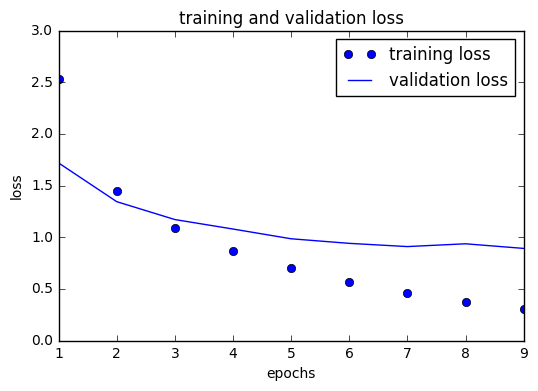

In [8]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

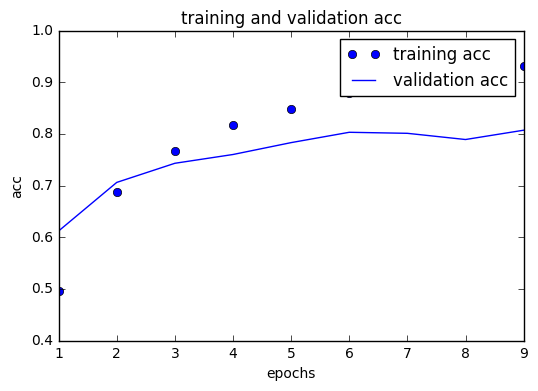

In [9]:
plt.clf()

acc=history.history['acc']
val_acc=history.history['val_acc']
epochs=range(1,len(loss)+1)
plt.plot(epochs,acc,'bo',label='training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('training and validation acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()

plt.show()